## Definitions

#### HHS - Department of Health and Human Services
Cabinet level department whose mandate includes receiving refugees. Current head: [Alex Azar](https://en.wikipedia.org/wiki/Alex_Azar)
#### ORR - Office of Refugee Resettlement
Program within the HHS that settles refugees. I'll use the term HHS for work that the ORR does, but many sources make the distinction.
#### UAC - Unaccompanied Alien Child
Legal status given to refugee children when crossing the border, traditionally in cases where a guardian is not present.

## Analysis

The number of detained children that I've found in articles are not apples-to-apples numbers. I've plotted them as such here because I didn't know any better before doing this. I left them this way because I think the distinctions between the reported numbers would be lost on most people unless they were paying a lot of attention to what was going on. 

Several events are included as vertical lines. I thought they may be influential on both the media's reporting and on the government's methods of reporting the data to fit a narrative.

As can be seen below, this cursory look at the numbers doesn't make a bit of sense.

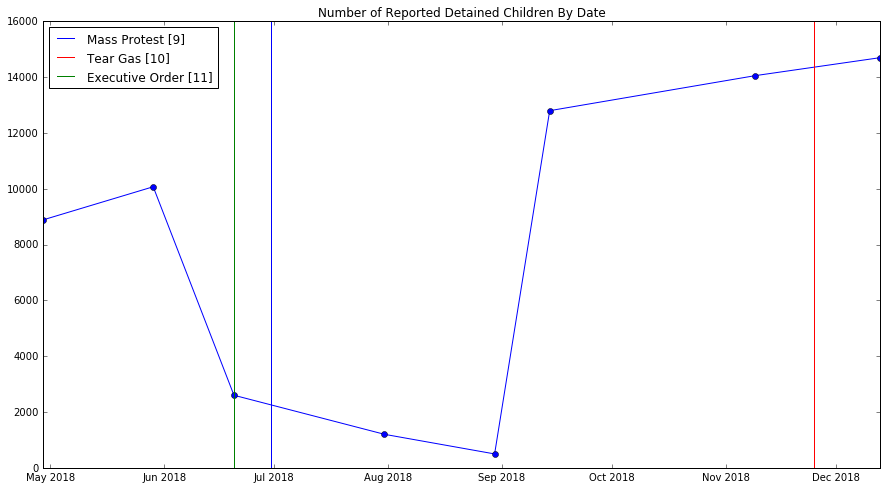

In [11]:
plot_reported_detained()

When the zero-tolerance policy that required families to be separated at the border was implemented, the only relevant number that could be obtained from the HHS was the total number of UAC. The reason for this being that once the families were split, children were considered UAC and processed the same as children who came without adults.

The sharp decline at the end of May is due to this change in reporting. I assume this is because the media was more interested in children who were separated from their family. This would be logical -- it wasn't known at this point that the procedure for UAC who had not been separated from their families would soon be changing. The sharp increase in September is due to the media generally returning to a similar UAC metric (more on that).

Plotting only UAC numbers makes more sense for now. It is going up a steady rate. It is clear we are imprisoning more and more children.

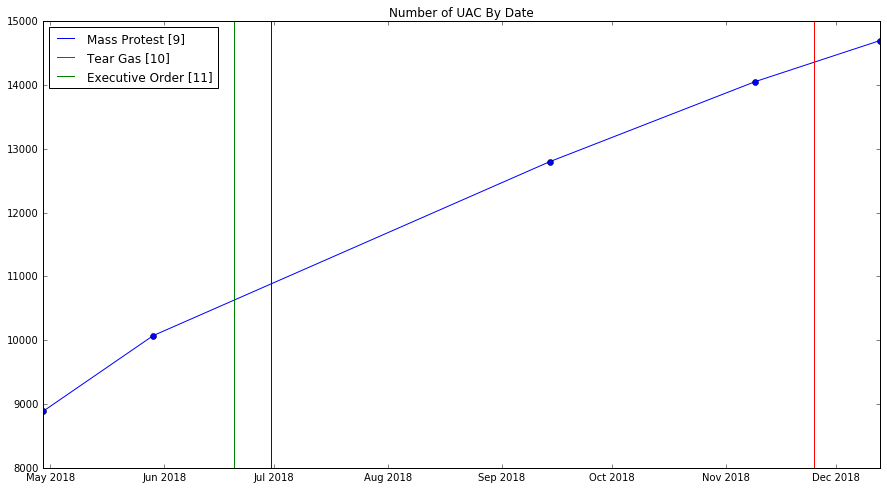

In [12]:
plot_uac_detained()

The executive order that Trump signed on June 20th to end family separation carried with it an extremely important caveat. It served as an excuse to dismantle something referred to as the Flores agreement, which was a set of rules that governed how both UAC and families with children could be treated.

The Flores rules were primarily meant to guarantee children certain rights. Basic necessities, such as food, water, medical treatment, running water, etc. were to be provided. Additionally, they would be released and reunited with an adult as soon as possible.

Courts also decided that these rights extend to children with families, and by extension the families themselves (since they were not to be separated). Families with children were to be released after twenty days. The Trump administration viewed this as a loophole that led to a "catch and release" immigration policy.

In summary, doing away with Flores does several things to harm children that I'm focusing on. It removes rules on the treatment of children, so they can be kept in adult detention centers in worse conditions. It also removes the time constraints on how soon a release must happen, whether it be a UAC or a family with childrne. 

The Flores agreement was always meant to be superceded by a more thought-out legal framework. The only reason it has stuck around for so long is the solutions to it were hard and every attempt by previous administrations had to be rolled back. All it would take is a stroke of a pen and an alibi to remove these protections though. Not only that, since it was not rolling back established law, the framework could be replaced without entering the public record.

It wasn't known until later that in addition to removing the protectons provided by Flores, the detainment procedures were altered to be more strict on the adults who were accompanying children at the border. The purported reasoning was to fight human trafficking -- but it's difficult to see it as anything other than an excuse to separate families without calling it separation.

The number of UAC reported by the HHS are influenced by these policy changes. I have called the original post zero-tolerance policy for children UAC A in the plot below. This includes children who were unaccompanied by the Flores' definition, and children who were separated from their families.

Under immense political pressure, the administration scrubbed through the pool of UAC A to discover which children had been separated from their parents under the new policy. Since no records of this were required and there was little transparency, there is not much reason to believe the numbers. Regardless, a number was produced. This shows up in the plot as separated children. This 'pool' of separated children was reported on for several months and their reunification has been recorded in the plot below from official HHS statements reported by the media.

While the number of this pool of separated children was decreasing, the children of UAC who were not considered separated lost their legal protections. I have called this new group UAC B. UAC B continued to grow while the selected group of separated children were reunited with their families. It is important to note that UAC B continued to grow under this more strict policy on which child was unaccompanied. It seems quite likely that after the pool of separated children was made, many children joined UAC B who would have been considered separated prior to the new rules.

The number of children in the UAC B group was not reported on while separated children were being reported on. I have taken the liberty of linearly interpolating the end of UAC A reporting to the beginning of UAC B reporting, while subtracting out the number of separated children where that number is available. It's also worth noting that the period of June in the plot doesn't really make sense -- the three groups plotted below should never all be active at the same time. I haven't fixed it primarily because it's not public knowledge when exactly these policies were changed and for now I'll leave it as a sort of transition zone.

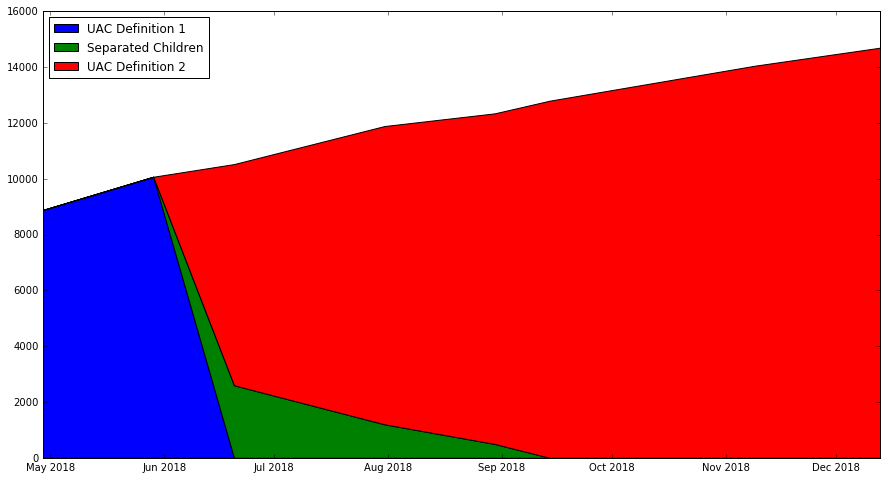

In [13]:
plot_stacked_immigration_types()

The above plot fails to capture a newly created group -- families with children who can now be detained indefinitely in adult detention centers. I have not seen any reporting on what this number might be, but we can maybe approximate it.

The last reported number I have for UAC A is about 10,000, and from this the pool of 2600 separated children was created. If it can be extrapolated that roughly 25% of children who would have been separated are now placed in adult detention centers with their families, then an additional 25% of all increases to UAC B will have been sent to adult detention centers.

This is plotted below. I am also assuming no family releases during this time, which I don't find too unreasonable since the stated goal of the administration is to end "catch and release".

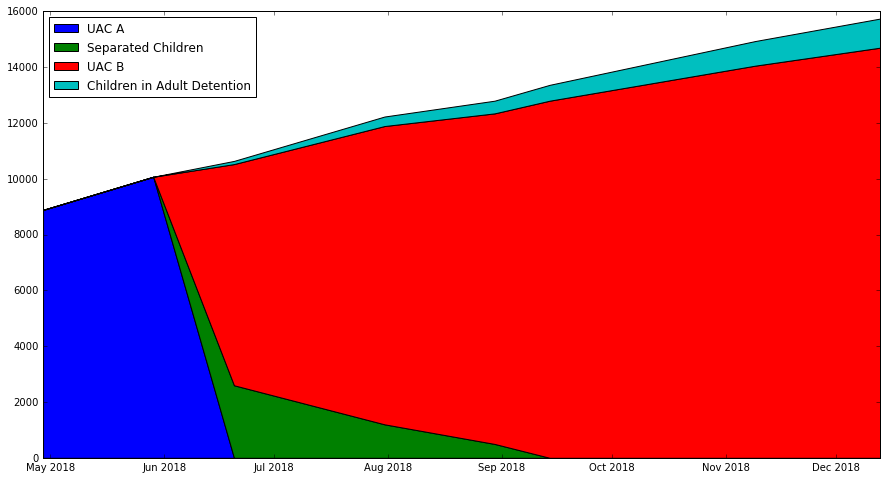

In [14]:
plot_stacked_immigration_plus_adult()

It's also now required that HHS perform a background check on child sponsors. The results of this background check are shared with ICE and without any limitations on its use -- they can arrest anyone they deem a criminal. Notably, just being undocumented is considered criminality and they have been deporting such people. It's entirely logical that this would prevent many sponsors from releasing children, even in cases where they are US citizens. This, combined with the lack of Flores rules for the prompt release of children, means that we can expect much longer wait times for release in the future.

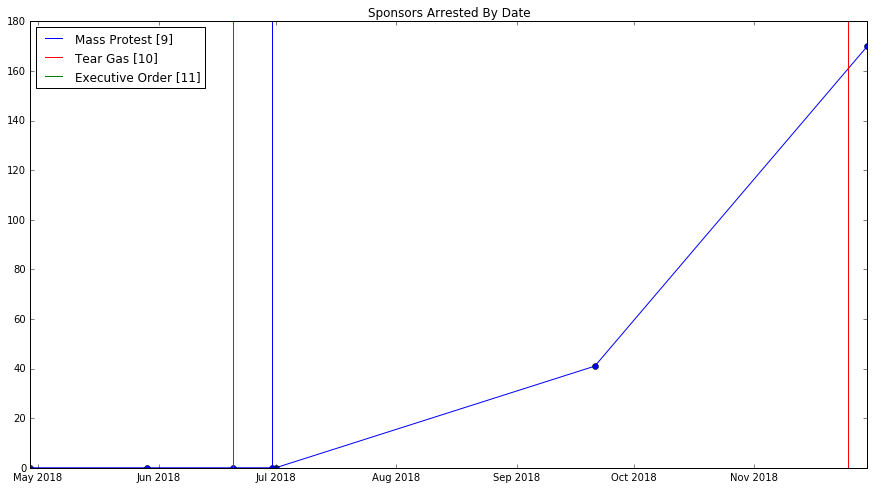

In [15]:
plot_sponsors_arrested()

## Summary

Thread. The reporting on Trump’s immigration policy has been downright confusing (for me, at least). I spent hours last night reading old articles and immigration law to figure this out. Spoiler: Our government is really, truly building permanent internment camps on the border.

1/ The number of detained children being reported about fluctuated wildly over time. This is because the metrics the media has been interested in have changed with time due to changing immigration policies.

2/ When zero-tolerance policy was introduced in April, numbers reported were generally for all “unaccompanied alien children” (UAC) in custody. It had to be this way, once a child was separated they became unaccompanied. Prior, UAC status did not apply to children w/families

3/ Reported numbers during late May (UAC including separated children): ~8000-10000

4/ News articles at this time focused on children separated from their families, which is a number that could NOT be reported because it wasn’t split from UAC number. In early June, involved govt orgs supposedly did a scrub of UAC to find those which had been separated at the border.

5/ Reported numbers during mid June (Separated children): ~2500

6/ June 20th, under immense political pressure, that stupid orange guy signed an executive order to “keep” families together (in detention). The “compromise” through which this accomplished was the removal of something called the Flores agreement.

7/ Flores rules that both a family w/children and UAC must be released within 20 days. The WH viewed this as a loophole that led to “catch and release”, which they wanted to end. So what was traded was family separation vs. indefinite detention of literally all children.

8/ In addition to limits on the length of detention, Flores rules ensured basic services for all UAC such as education, medical care, etc.

9/ During this time, the majority of the “original” separated children were handled. Reported numbers during late August (Separated children): ~500

10/ After this, the press started to report on the total number of UAC. This does not include children who were originally reported on as being separated, because those children were now being detained with their families in adult detention centers.

11/ Reported numbers during early September (new definition of UAC, minus some children who might have been separated): ~12000

12/ The rules determining whether an adult “accompanied” a child were changed significantly as well. For example, an aunt traveling with a child might now not be considered close enough, and the child would then be UAC.

13/ Health and Human Services (HHS) who are responsible for UAC are now required to share information on child sponsors with ICE, where they vet the entire household for “criminality”. This concept of criminality includes being in the US illegally.

14/ Reported numbers during mid December (new definition of UAC, minus some children who might have been separated): ~14500

15/ THE SITUATION IS GETTING WORSE

## Sources

Links are referred to by their bracketed number in the raw data, so each bit of data is traceable.

In cases where a range is given (e.g. 4-6 months), the average of the range (5 months) is chosen.

* [NPR, December 13th [1]](https://www.npr.org/2018/12/13/676300525/almost-15-000-migrant-children-now-held-at-nearly-full-shelters)
* [SF Chronicle, November 9th, [2]](https://www.sfchronicle.com/nation/article/More-than-14-000-immigrant-children-are-in-U-S-13399510.php)
* [Washington Post, August 30th, [3]](https://www.washingtonpost.com/local/immigration/still-separated-nearly-500-separated-migrant-children-remain-in-us-custody/2018/08/30/6dbd8278-aa09-11e8-8a0c-70b618c98d3c_story.html?utm_term=.db8790abe02a)
* [CNN, December 10th, [4]](https://www.cnn.com/2018/12/10/politics/ice-potential-sponsors-arrests/index.html)
* [CNN, September 14th, [5]](https://www.cnn.com/2018/09/14/politics/immigrant-children-kept-detention/index.html)
* [WSJ, October 19th, [6]](https://www.wsj.com/articles/immigrant-children-are-staying-longer-in-government-custody-1539941401)
* [Washington Post, May 29th, [7]](https://www.washingtonpost.com/world/national-security/trumps-zero-tolerance-at-the-border-is-causing-child-shelters-to-fill-up-fast/2018/05/29/7aab0ae4-636b-11e8-a69c-b944de66d9e7_story.html?utm_term=.831c55ba33e5)
* [Guardian, September 21st, [8]](https://www.theguardian.com/us-news/2018/sep/21/ice-arrests-undocumented-immigrants-sponsoring-migrant-children)
* [MoveOn, June 30th, [9]](https://act.moveon.org/event/families-belong-together_attend1/search/)
* [NYT, November 25th, [10]](https://www.nytimes.com/2018/11/25/world/americas/tijuana-mexico-border.html)
* [Washington Post, June 20th, [11]](https://www.washingtonpost.com/powerpost/gop-leaders-voice-hope-that-bill-addressing-family-separations-will-pass-thursday/2018/06/20/cc79db9a-7480-11e8-b4b7-308400242c2e_story.html)
* [Washington Post, May 7th, [12]](https://www.washingtonpost.com/world/national-security/sessions-says-justice-dept-will-prosecute-every-person-who-crosses-border-unlawfully/2018/05/07/e1312b7e-5216-11e8-9c91-7dab596e8252_story.html)
* [Justice For Immigrants, Undated, [13]](https://justiceforimmigrants.org/what-we-are-working-on/unaccompanied-children/orr-and-dhs-information-sharing-agreement-its-consequences/)

## Raw Data

In [16]:
disp_data(df)

,Link,Date,Detained,UAC Detained Def1,UAC Detained Def2,UAC Detained,Separated Detained,Detention Time Official (days),Detention Time Unofficial (days),Sponsors Arrested,Accumulated Cost ($million)
0,7,2018-04-29,8886.0,8886.0,NaN,8886.0,NaN,NaN,NaN,NaN,NaN
1,7,2018-05-29,10073.0,10073.0,NaN,10073.0,NaN,NaN,NaN,NaN,NaN
2,3,2018-06-20,2600.0,NaN,NaN,NaN,2600.0,NaN,NaN,NaN,NaN
3,6,2018-06-30,NaN,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN
4,4,2018-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
5,3,2018-07-31,1200.0,NaN,NaN,NaN,1200.0,NaN,NaN,NaN,NaN
6,3,2018-08-30,497.0,NaN,NaN,NaN,497.0,NaN,NaN,NaN,NaN
7,5,2018-09-14,12800.0,NaN,12800.0,12800.0,NaN,NaN,NaN,NaN,NaN
8,8,2018-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN
9,6,2018-10-19,NaN,NaN,NaN,NaN,NaN,59.0,136.000,NaN,NaN


In [17]:
disp_data(event_df)

,Date,Link,Name
0,2018-04-07,11,Zero Tolerance Policy
1,2018-04-13,13,Information Sharing HHS/ICE
2,2018-06-20,11,Executive Order
3,2018-06-30,9,Mass Protest
4,2018-11-25,10,Tear Gas


## Code

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
import collections

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

import copy

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def make_row(
        link,
        date,
        detained=None, # Number detained children as reported by any metric
        uac_detained_def1=None, # Number detained children during zero-tolerance, = UAC + separated children
        separated_detained=None, # Number of detained children who were determined to be separated in June
        uac_detained_def2=None, # Number of detained children post zero-tolerance, = UAC - children with families,
        uac_detained_all_def=None, # Number of detained UAC, all definitions
        detention_time_official=None, # Officially stated averange detention time from HHS
        detention_time_unofficial=None, # Unreliable comments about actual detention time from people on ground
        sponsors_arrested=None, # Number of child sponsors arrested by ICE
        cost=None, # Accumulated cost post zero tolerance. Might be hard to find data.
    ):
    
    row_data = collections.OrderedDict()
    row_data['Link'] = link
    row_data['Date'] = date
    row_data['Detained'] = detained
    row_data['UAC Detained Def1'] = uac_detained_def1
    row_data['UAC Detained Def2'] = uac_detained_def2
    row_data['UAC Detained'] = uac_detained_all_def
    row_data['Separated Detained'] = separated_detained
    row_data['Detention Time Official (days)'] = detention_time_official
    row_data['Detention Time Unofficial (days)'] = detention_time_unofficial
    row_data['Sponsors Arrested'] = sponsors_arrested
    row_data['Accumulated Cost ($million)'] = cost
    return row_data

data = [
    make_row(
        1,
        datetime.date(2018, 12, 13),
        detained=14700,
        uac_detained_def2=14700,
        uac_detained_all_def=14700,
        detention_time_official=50,
        detention_time_unofficial=243.334
    ),
    make_row(
        2,
        datetime.date(2018, 11, 9),
        detained=14056,
        uac_detained_def2=14056,
        uac_detained_all_def=14056,
        cost=80
    ),
    make_row(
        3,
        datetime.date(2018, 8, 30),
        detained=497,
        separated_detained=497
    ),
    make_row(
        3,
        datetime.date(2018, 7, 31),
        detained=1200,
        separated_detained=1200
    ),
    make_row(
        3,
        datetime.date(2018, 6, 20),
        detained=2600,
        separated_detained=2600,
    ),
    #make_row(
    #    3,
    #    datetime.date(2018, 6, 19),
    #    uac_detained_def1=0
    #),
    make_row(
        4,
        datetime.date(2018, 7, 1),
        sponsors_arrested=0
    ),
    make_row(
        4,
        datetime.date(2018, 11, 30),
        sponsors_arrested=170
    ),
    make_row(
        5,
        datetime.date(2018, 9, 14),
        detained=12800,
        uac_detained_def2=12800,
        uac_detained_all_def=12800
    ),
    make_row(
        6,
        datetime.date(2018, 10, 19),
        detention_time_official=59,
        detention_time_unofficial=136
    ),
    make_row(
        6,
        datetime.date(2018, 6, 30),
        detention_time_official=56
    ),
    make_row(
        7,
        datetime.date(2018, 5, 29),
        detained=10073,
        uac_detained_def1=10073,
        uac_detained_all_def=10073
    ),
    make_row(
        7,
        datetime.date(2018, 4, 29),
        detained=8886,
        uac_detained_def1=8886,
        uac_detained_all_def=8886
    ),
    make_row(
        8,
        datetime.date(2018, 9, 21),
        sponsors_arrested=41
    ),
]
df = pd.DataFrame(data=data)

In [3]:
# label: (link #, date, color)
raw_events = {
    'Tear Gas': (
        10,
        datetime.date(2018, 11, 25),
        'red'
    ),
    'Zero Tolerance Policy': (
        11,
        datetime.date(2018, 4, 7),
        'green'
    ),
    'Mass Protest': (
        9,
        datetime.date(2018, 6, 30),
        'blue'
    ),
    'Information Sharing HHS/ICE': (
        13,
        datetime.date(2018, 4, 13),
        'green'
    ),
    'Executive Order': (
        11,
        datetime.date(2018, 6, 20),
        'green'
    )
}
event_data = collections.defaultdict(list)
for name in raw_events.iterkeys():
    event_data['Name'].append(name)
    event_data['Link'].append(raw_events[name][0])
    event_data['Date'].append(raw_events[name][1])

event_df = pd.DataFrame(
    data=event_data
)

In [4]:
def time_evolution(df, y_column, title, events):
    ys_mask = np.isfinite(df[y_column].values)
    ys = df[y_column].values[ys_mask]
    xs = df.Date.values[ys_mask]
    
    xs, ys = zip( *sorted( zip(xs, ys) ) )
    
    plt.xlim = (
        min(
            df.Date.unique() - datetime.timedelta(days=20)
        ),
        max(
            df.Date.unique() + datetime.timedelta(days=20)
        )
    )
    plt.ylim = (
        0.0,
        max(
            ys
        )
    )
    
    plt.plot(
        xs,
        ys,
        marker='o'
    )
    plt.title(title)
    
    def _plot_event(col_name, color, label):
        plt.axvline(
            x=df.Date[df[col_name] == True].values,
            color=color,
            label=label
        )
    
    for event in events:
        link_id, date, color = raw_events[event]
        
        plt.axvline(
            x=date,
            color=color,
            label='{0} [{1}]'.format(event, link_id)
        )

    plt.legend()
    
    ax = plt.subplot(111)
    ax.legend(loc='upper left')

In [5]:
def disp_data(df):
    return df.sort_values(by='Date').reset_index().drop('index', axis=1)

In [6]:
def plot_reported_detained():
    time_evolution(
        df, 'Detained', 'Number of Reported Detained Children By Date',
        events=['Mass Protest', 'Tear Gas', 'Executive Order']
    )

In [7]:
def plot_uac_detained():
    time_evolution(
        df, 'UAC Detained', 'Number of UAC By Date',
        events=['Mass Protest', 'Tear Gas', 'Executive Order']
    )

In [8]:
def plot_stacked_immigration_types():
    f = copy.deepcopy(df)
    
    # sorting by date eases eventual plotting, because sorted dates are needed to plot
    # and the values should be masked by sorted dates
    f = f.sort_values(by='Date').reset_index().drop('index', axis=1)
    uac1_mask = np.isfinite(f['UAC Detained Def1'].values)
    separated_mask = np.isfinite(f['Separated Detained'].values)
    uac2_mask = np.isfinite(f['UAC Detained Def2'].values)
    uac1_separated_mask = (uac1_mask == True) | (separated_mask == True)
    uac1_separated_uac2_mask = (uac1_separated_mask == True) | (uac2_mask == True)

    labels = [
        'UAC Definition 1',
        'Separated Children',
        'UAC Definition 2',
    ]
    
    # [ [uac def 1, ...], [separated, ...], [uac def 2, ...] ]
    
    # The values are deep-copied here to preserve the pre-interpolated values
    uac1_values = copy.deepcopy(f['UAC Detained Def1'].values)
    separated_values = copy.deepcopy(f['Separated Detained'].values)
    uac2_values = copy.deepcopy(f['UAC Detained Def2'].values)
    
    # The frame is interpolated so we can get a UAC all definition that exists over separated values
    uac_values = copy.deepcopy(f.interpolate()['UAC Detained'].values)
    
    # UAC1 is mutually exclusive with the others.
    uac1_values[np.isnan(uac1_values)] = 0.0
    
    # In the raw data, separated is mutually exclusive from UAC1 and UAC2 reporting
    separated_values[np.isnan(separated_values)] = 0.0
    
    # Mutually exclusive from Def 1
    uac2_values[uac1_mask] = 0.0
    
    # derived in the case where separated values are provided
    uac2_values[separated_mask] = uac_values[separated_mask] - separated_values[separated_mask]
    
    dates, uac1_val, sep_val, uac2_val = zip(
        *sorted(
            zip(
                f.Date.values[uac1_separated_uac2_mask],
                uac1_values[uac1_separated_uac2_mask],
                separated_values[uac1_separated_uac2_mask],
                uac2_values[uac1_separated_uac2_mask]
            )
        )
    )

    plt.stackplot(
        dates,
        [
            uac1_val,
            sep_val,
            uac2_val
        ],
        labels=labels
    )
    plt.legend(loc='upper left')

In [9]:
def plot_stacked_immigration_plus_adult():
    f = copy.deepcopy(df)
    
    # sorting by date eases eventual plotting, because sorted dates are needed to plot
    # and the values should be masked by sorted dates
    f = f.sort_values(by='Date').reset_index().drop('index', axis=1)
    uac1_mask = np.isfinite(f['UAC Detained Def1'].values)
    separated_mask = np.isfinite(f['Separated Detained'].values)
    uac2_mask = np.isfinite(f['UAC Detained Def2'].values)
    uac1_separated_mask = (uac1_mask == True) | (separated_mask == True)
    uac1_separated_uac2_mask = (uac1_separated_mask == True) | (uac2_mask == True)
    separated_uac2_mask = (separated_mask == True) | (uac2_mask == True)

    labels = [
        'UAC A',
        'Separated Children',
        'UAC B',
        'Children in Adult Detention',
    ]
    
    # [ [uac def 1, ...], [separated, ...], [uac def 2, ...] ]
    
    # The values are deep-copied here to preserve the pre-interpolated values
    uac1_values = copy.deepcopy(f['UAC Detained Def1'].values)
    separated_values = copy.deepcopy(f['Separated Detained'].values)
    uac2_values = copy.deepcopy(f['UAC Detained Def2'].values)
    
    # The frame is interpolated so we can get a UAC all definition that exists over separated values
    uac_values = copy.deepcopy(f.interpolate()['UAC Detained'].values)
    
    adult_values = np.zeros(len(uac_values))
    adult_values[separated_uac2_mask] = np.append(
        # The first data point here is a special case
        [.25 * (uac_values[separated_uac2_mask][0] - uac_values[uac1_mask][-1]) ],
        np.add.accumulate(
            .25 * (np.diff(uac_values[separated_uac2_mask]))
        )
    )

    # UAC1 is mutually exclusive with the others.
    uac1_values[np.isnan(uac1_values)] = 0.0
    
    # In the raw data, separated is mutually exclusive from UAC1 and UAC2 reporting
    separated_values[np.isnan(separated_values)] = 0.0
    
    # Mutually exclusive from Def 1
    uac2_values[uac1_mask] = 0.0
    
    # derived in the case where separated values are provided
    uac2_values[separated_mask] = uac_values[separated_mask] - separated_values[separated_mask]
    
    dates, uac1_val, sep_val, uac2_val, adult_val = zip(
        *sorted(
            zip(
                f.Date.values[uac1_separated_uac2_mask],
                uac1_values[uac1_separated_uac2_mask],
                separated_values[uac1_separated_uac2_mask],
                uac2_values[uac1_separated_uac2_mask],
                adult_values[uac1_separated_uac2_mask]
            )
        )
    )

    plt.stackplot(
        dates,
        [
            uac1_val,
            sep_val,
            uac2_val,
            adult_val
        ],
        labels=labels
    )
    plt.legend(loc='upper left')

In [10]:
def plot_sponsors_arrested():
    f = copy.deepcopy(df)
    start_date = raw_events['Information Sharing HHS/ICE'][1]
    
    first_arrest_data_date = f.Date[f['Sponsors Arrested'] == 0.0].values[0]
    
    for idx in f.index:
        if f.iloc[idx].Date < first_arrest_data_date:
            f.at[idx, 'Sponsors Arrested'] = 0.0
    
    time_evolution(
        f, 'Sponsors Arrested', 'Sponsors Arrested By Date',
        events=['Mass Protest', 'Tear Gas', 'Executive Order']
    )